Practice Phase project 3 of 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


This dataset contains the details of grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades which it contains both numerical and categorical data are present.Here 'CGPA' is the target variable which contains continous value so it will be terms of Regression problem where we need to predict the CGPA score.

EDA(Exploratory Data Analysis)

In [4]:
df.shape

(571, 43)

This dataset contains 571 rows and 43 columns ,out of which 1 target variable and remaining 42 are independent variables.

In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

To check the data types of the columns

In [6]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

To check the null values

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As we can see above dataset there is most of the columns has nan value/missing values present in dataset so here we can't drop those columns  instead we can manage using mean of the value here.

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [9]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
df['CS-412']=df['CS-412'].fillna(df['CS-412'].mean())

In [12]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412        0
CGPA          0
dtype: int64

In [13]:
df['CS-423']=df['CS-423'].fillna(df['CS-423'].mean())

In [14]:
df['CS-419']=df['CS-419'].fillna(df['CS-419'].mean())

In [15]:
df['CS-414']=df['CS-414'].fillna(df['CS-414'].mean())

In [16]:
df['CS-406']=df['CS-406'].fillna(df['CS-406'].mean())

In [17]:
df['CS-421']=df['CS-421'].fillna(df['CS-421'].mean())

In [18]:
df['CS-403']=df['CS-403'].fillna(df['CS-403'].mean())

In [19]:
df['CS-317']=df['CS-317'].fillna(df['CS-317'].mean())

In [20]:
df['CS-318']=df['CS-318'].fillna(df['CS-318'].mean())

In [21]:
df['CS-312']=df['CS-312'].fillna(df['CS-312'].mean())

In [22]:
df['CS-306']=df['CS-306'].fillna(df['CS-306'].mean())

In [23]:
df['CS-302']=df['CS-302'].fillna(df['CS-302'].mean())

In [24]:
df['CS-301']=df['CS-301'].fillna(df['CS-301'].mean())

In [25]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301        0
CS-302        0
TC-383       10
MT-442       10
EL-332        9
CS-318        0
CS-306        0
CS-312        0
CS-317        0
CS-403        0
CS-421        0
CS-406        0
CS-414        0
CS-419        0
CS-423        0
CS-412        0
CGPA          0
dtype: int64

In [26]:
df['MT-442']=df['MT-442'].fillna(df['MT-442'].mean())

In [27]:
df['EL-332']=df['EL-332'].fillna(df['EL-332'].mean())

In [28]:
df['TC-383']=df['TC-383'].fillna(df['TC-383'].mean())

In [29]:
df['HS-304']=df['HS-304'].fillna(df['HS-304'].mean())

In [30]:
df['EF-303']=df['EF-303'].fillna(df['EF-303'].mean())

In [31]:
df['MT-331']=df['MT-331'].fillna(df['MT-331'].mean())

In [32]:
df['CS-214']=df['CS-214'].fillna(df['CS-214'].mean())

In [33]:
df['CS-215']=df['CS-215'].fillna(df['CS-215'].mean())

In [34]:
df['CS-212']=df['CS-212'].fillna(df['CS-212'].mean())

In [35]:
df['CS-211']=df['CS-211'].fillna(df['CS-211'].mean())

In [36]:
df['CS-203']=df['CS-203'].fillna(df['CS-203'].mean())

In [37]:
df['CS-107']=df['CS-107'].fillna(df['CS-107'].mean())

In [38]:
df['CS-106']=df['CS-106'].fillna(df['CS-106'].mean())

In [39]:
df['CS-105']=df['CS-105'].fillna(df['CS-105'].mean())

In [40]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105/12    1
MT-111       2
CS-105       0
CS-106       0
EL-102       2
EE-119       2
ME-107       2
CS-107       0
HS-205/20    5
MT-222       5
EE-222       7
MT-224       7
CS-210       7
CS-211       0
CS-203       0
CS-214       0
EE-217       6
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [41]:
df['MT-224']=df['MT-224'].fillna(df['MT-224'].mean())

In [42]:
df['MT-222']=df['MT-222'].fillna(df['MT-222'].mean())

In [43]:
df['MT-111']=df['MT-111'].fillna(df['MT-111'].mean())

In [44]:
df['EE-222']=df['EE-222'].fillna(df['EE-222'].mean())

In [45]:
df['EE-217']=df['EE-217'].fillna(df['EE-217'].mean())

In [46]:
df['HS-205/20']=df['HS-205/20'].fillna(df['HS-205/20'].mean())

In [47]:
df['ME-107']=df['ME-107'].fillna(df['ME-107'].mean())

In [48]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105/12    1
MT-111       0
CS-105       0
CS-106       0
EL-102       2
EE-119       2
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       7
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [49]:
df['EE-119']=df['EE-119'].fillna(df['EE-119'].mean())

In [50]:
df['EL-102']=df['EL-102'].fillna(df['EL-102'].mean())

In [51]:
df['HS-105/12']=df['HS-105/12'].fillna(df['HS-105/12'].mean())

In [52]:
df['CY-105']=df['CY-105'].fillna(df['CY-105'].mean())

In [53]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       7
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [54]:
df['CS-210']=df['CS-210'].fillna(df['CS-210'].mean())

<Axes: >

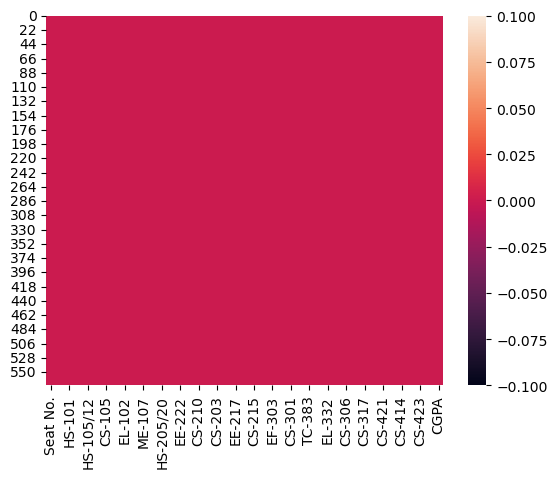

In [55]:
sns.heatmap(df.isnull())

As you can see visualy we filled all nan values to mean and now there is no nan /missing values present in the dataset.

Checking number of unique value in each columns.

In [56]:
df.nunique().to_frame('number of unique values')

,number of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,14
HS-105/12,14
MT-111,14
CS-105,11
CS-106,14
EL-102,14
EE-119,13


In [57]:
df.drop('Seat No.',axis=1,inplace=True)

In [58]:
df['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

Description of dataset(it gives the statistical summary of numerical columns)

In [59]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.903509,4.249123,3.903339,2.838879,4.130053,3.966608,3.892794,4.789104,...,4.126560,4.831843,3.506261,5.436494,3.156379,2.453405,3.899642,4.016158,3.217480,2.954888
std,3.046895,2.785317,2.962246,3.195563,2.986427,2.696709,2.724282,3.029205,2.655171,3.141877,...,3.337194,2.740276,2.937874,2.706553,2.433723,2.472405,2.365831,2.778001,2.294054,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.966608,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. Here Mean is greater than  Median means right skwness present in the dataset. As we can see 75th percentile and Max values are high so there is outliers present in the dataset.

In [60]:
df.shape

(571, 42)

Data Visulization

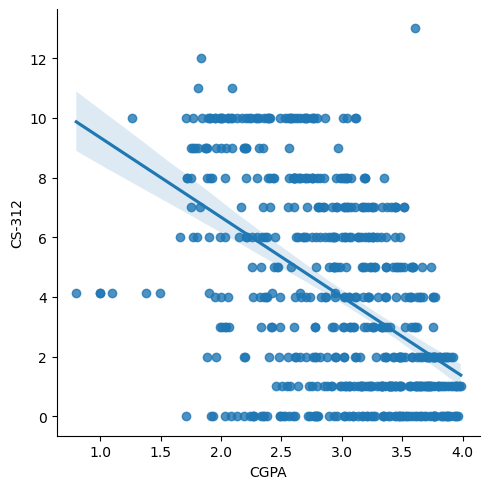

In [61]:
sns.lmplot(x='CGPA',y='CS-312',data=df,palette='colorblind')

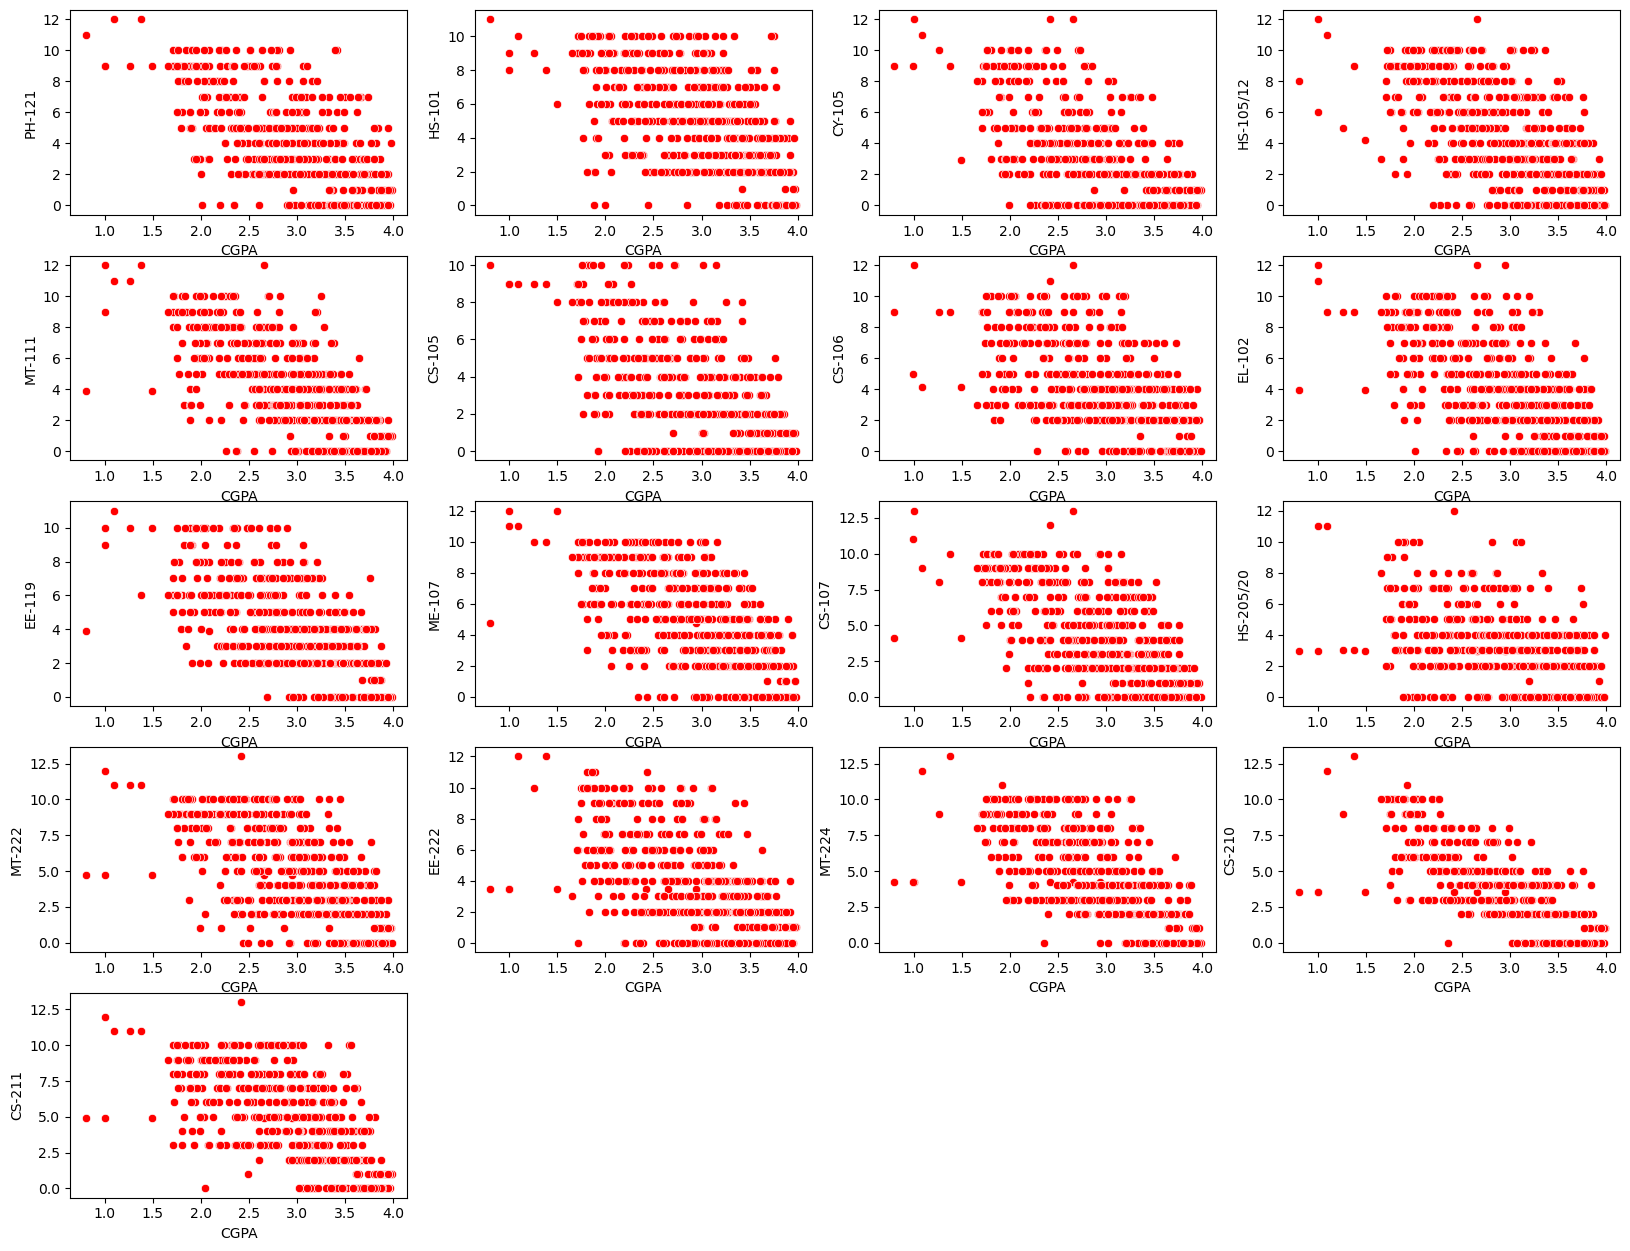

In [62]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(8,4,p)
        sns.scatterplot(x='CGPA',y=i,data=df,color='r')
        plt.xlabel('CGPA')
        plt.ylabel(i)
    p+=1
plt.show()

PH-121          Axes(0.125,0.786098;0.0824468x0.0939024)
HS-101       Axes(0.223936,0.786098;0.0824468x0.0939024)
CY-105       Axes(0.322872,0.786098;0.0824468x0.0939024)
HS-105/12    Axes(0.421809,0.786098;0.0824468x0.0939024)
MT-111       Axes(0.520745,0.786098;0.0824468x0.0939024)
CS-105       Axes(0.619681,0.786098;0.0824468x0.0939024)
CS-106       Axes(0.718617,0.786098;0.0824468x0.0939024)
EL-102       Axes(0.817553,0.786098;0.0824468x0.0939024)
EE-119          Axes(0.125,0.673415;0.0824468x0.0939024)
ME-107       Axes(0.223936,0.673415;0.0824468x0.0939024)
CS-107       Axes(0.322872,0.673415;0.0824468x0.0939024)
HS-205/20    Axes(0.421809,0.673415;0.0824468x0.0939024)
MT-222       Axes(0.520745,0.673415;0.0824468x0.0939024)
EE-222       Axes(0.619681,0.673415;0.0824468x0.0939024)
MT-224       Axes(0.718617,0.673415;0.0824468x0.0939024)
CS-210       Axes(0.817553,0.673415;0.0824468x0.0939024)
CS-211          Axes(0.125,0.560732;0.0824468x0.0939024)
CS-203       Axes(0.223936,0.56

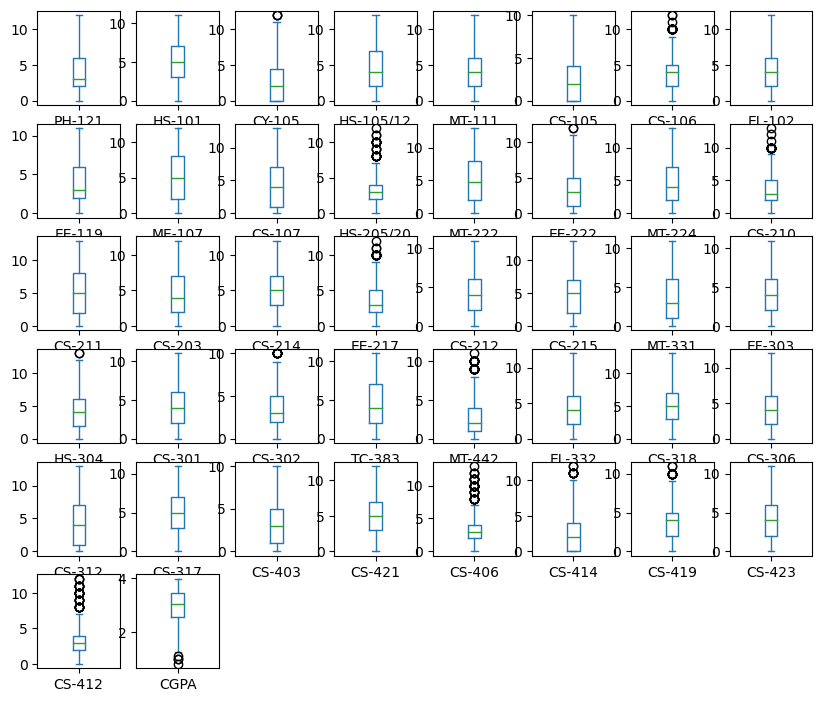

In [67]:
df.plot(kind='box',subplots=True,layout=(7,8),figsize=(10,10))

As  we have found outliers in the column 'CS-106','HS-205/20','CS-210','EE-217','CS-302','MT-442','CS-406','CS-414','CS-419','CS-412','CGPA'.To remove outliers Zscore is using before building the model

In [68]:
from scipy.stats import zscore
out_features=df[['CS-106','HS-205/20','CS-210','EE-217','CS-302','MT-442','CS-406','CS-414','CS-419','CS-412','CGPA']]
z=np.abs(zscore(out_features))
z

,CS-106,HS-205/20,CS-210,EE-217,CS-302,MT-442,CS-406,CS-414,CS-419,CS-412,CGPA
0,1.789175,0.432606,1.268578,1.290422,0.977681,0.333179,0.475565,0.993185,1.734677,0.531176,1.209480
1,1.789175,1.710112,2.368185,0.568549,2.581420,1.779316,0.475565,1.030910,0.888567,0.094885,1.527217
2,0.319611,0.419064,1.297173,1.290422,0.626059,1.112958,1.298071,0.993185,1.649763,1.403760,1.053392
3,2.156566,0.006771,0.902042,2.427520,0.576746,1.779316,0.758195,0.221272,1.311622,1.650282,1.691731
4,0.782562,1.270734,0.564101,1.290422,0.626059,0.389890,0.475565,0.993185,0.803653,1.403760,0.795331
...,...,...,...,...,...,...,...,...,...,...,...
566,0.782562,1.270734,1.297173,1.290422,1.427928,0.751424,1.298071,0.626091,0.042457,1.403760,1.359839
567,1.517344,0.432606,1.297173,1.290422,1.427928,0.751424,0.475565,0.221272,0.803653,0.531176,1.317904
568,1.517344,0.858442,0.564101,1.290422,0.175811,0.333179,1.298071,1.435729,0.042457,0.531176,0.830814
569,0.319611,1.710112,0.535506,0.568549,1.378615,1.779316,2.403209,1.435729,0.380598,1.213991,1.228834


In [69]:
threshold=3
np.where(z>3)

(array([ 60,  60,  91, 143, 281, 281, 281, 288, 288, 340, 352, 382, 387,
        387, 410, 423, 424, 432, 446, 447, 447, 453, 453, 454, 454, 454,
        509, 513, 516, 516, 521, 522, 522, 527, 543, 543, 550, 550, 557,
        560, 563, 565, 570], dtype=int64),
 array([ 1,  3,  2, 10,  1,  2, 10,  1, 10,  7,  7,  7,  7,  9,  7,  7,  7,
         9,  6,  6,  7,  6,  9,  6,  7,  8,  6,  9,  6,  9,  6,  6,  9,  9,
         6,  9,  7,  9,  7,  7,  8, 10,  6], dtype=int64))

In [70]:
df1=df[(z<3).all(axis=1)]

In [71]:
df1.shape

(541, 42)

In [72]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 571
new dataframe: 541


In [73]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 5.253940455341506


As you can see there is less than 10% of data loss after removing the outliers so it is considerable.

In [74]:
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.0,9.0,0.0,6.0,4.0,4.0,6.0,2.0,5.0,9.0,...,3.0,7.0,4.0,10.0,6.0,8.0,3.0,6.0,5.0,2.607
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


checking the Skewness

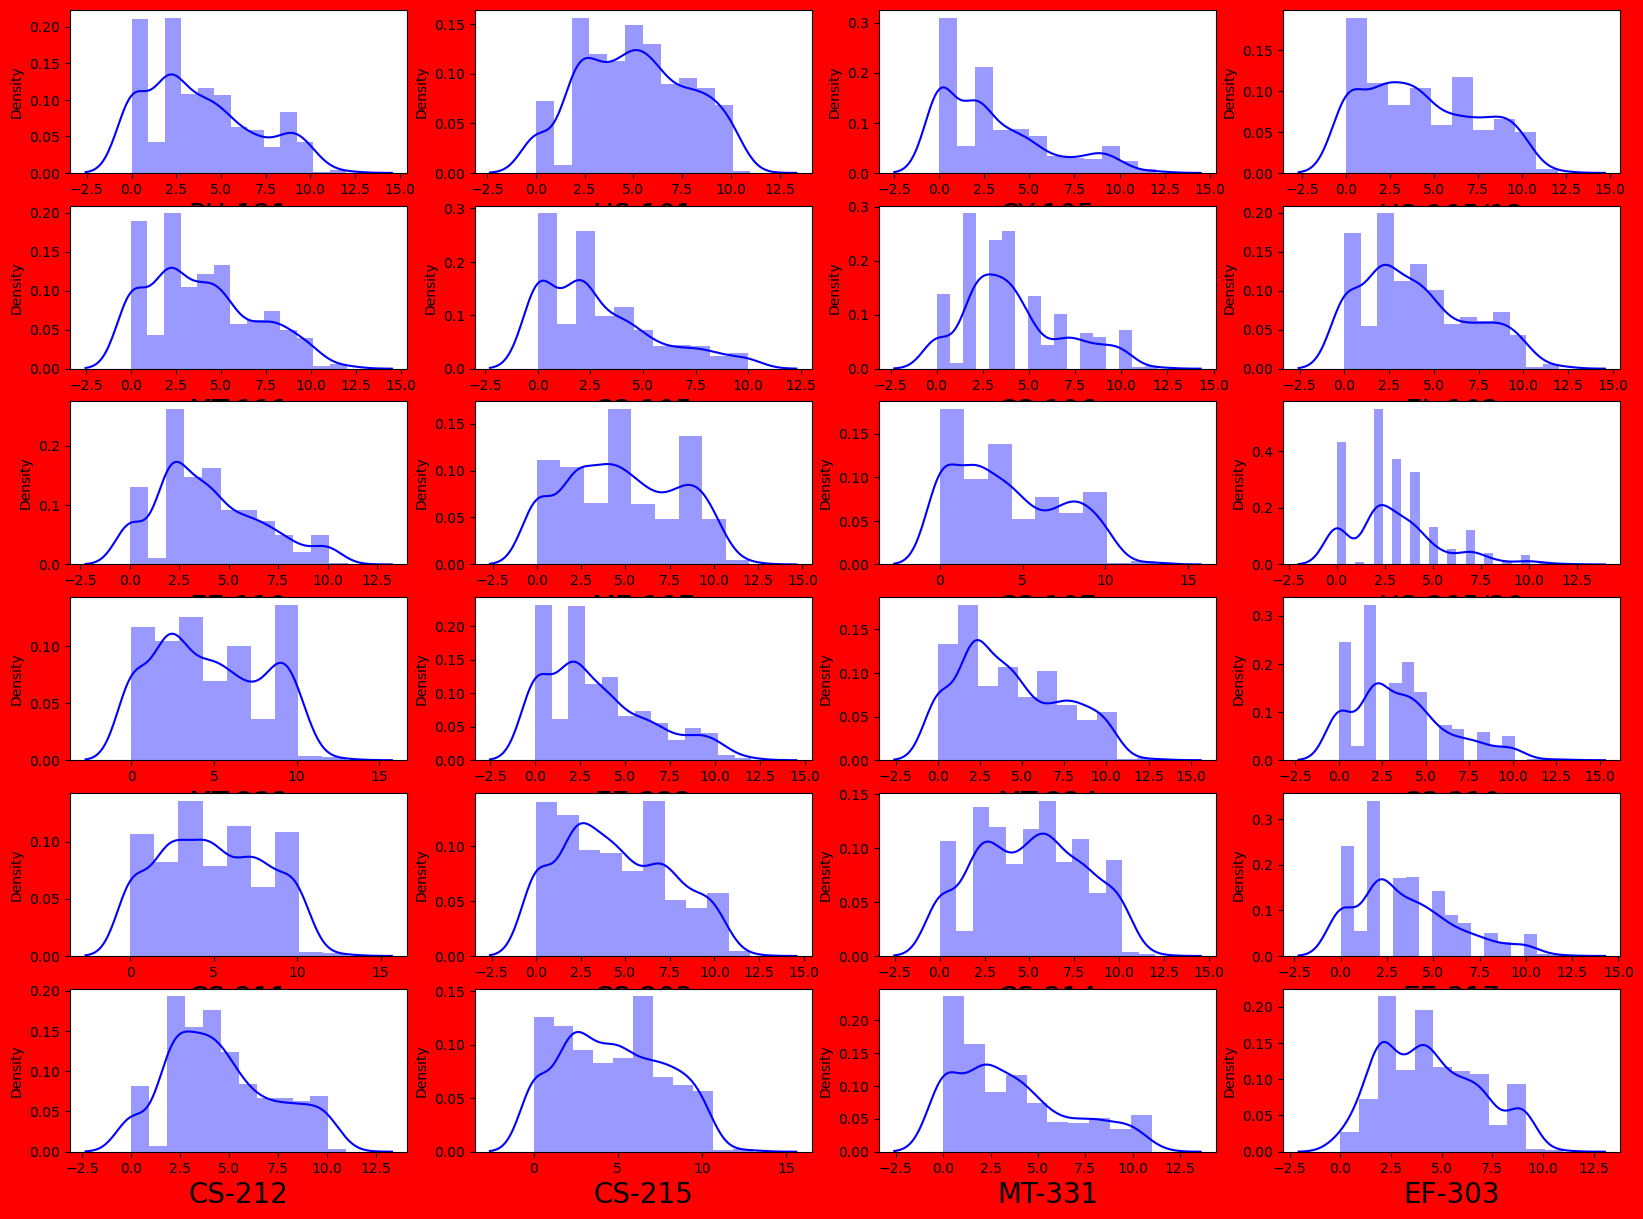

In [76]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()



In [77]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.981105
HS-105/12    0.322796
MT-111       0.480121
CS-105       0.930769
CS-106       0.635318
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107       0.411937
HS-205/20    0.888830
MT-222       0.178750
EE-222       0.753403
MT-224       0.412283
CS-210       0.709481
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217       0.712091
CS-212       0.399317
CS-215       0.144729
MT-331       0.617889
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442       0.853815
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403       0.603938
CS-421       0.141523
CS-406       1.385275
CS-414       1.288571
CS-419       0.473725
CS-423       0.491719
CS-412       1.188899
CGPA        -0.497203
dtype: float64

from above distribution plots we can notice that data in most looks normal columns except ,CS-406.so we can use cuberoot method to remove skweness here.

In [78]:
df['CS-406']=np.cbrt(df['CS-406'])

In [79]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.981105
HS-105/12    0.322796
MT-111       0.480121
CS-105       0.930769
CS-106       0.635318
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107       0.411937
HS-205/20    0.888830
MT-222       0.178750
EE-222       0.753403
MT-224       0.412283
CS-210       0.709481
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217       0.712091
CS-212       0.399317
CS-215       0.144729
MT-331       0.617889
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442       0.853815
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403       0.603938
CS-421       0.141523
CS-406      -1.240432
CS-414       1.288571
CS-419       0.473725
CS-423       0.491719
CS-412       1.188899
CGPA        -0.497203
dtype: float64

In [80]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.561257,0.503328,0.473865,0.609990,0.300326,0.428904,0.583942,0.539628,...,0.065546,0.462357,0.361424,0.322118,0.324991,0.184295,0.490516,0.120201,0.376729,-0.663135
HS-101,0.382436,1.000000,0.335929,0.474642,0.435802,0.400713,0.315237,0.352473,0.313500,0.340283,...,0.226366,0.363525,0.248781,0.318699,0.214254,0.242860,0.298372,0.241878,0.253986,-0.537170
CY-105,0.561257,0.335929,1.000000,0.509059,0.540425,0.582351,0.381355,0.449477,0.477587,0.472656,...,0.294275,0.470400,0.513598,0.389937,0.176640,0.047853,0.465035,0.152447,0.127349,-0.662887
HS-105/12,0.503328,0.474642,0.509059,1.000000,0.495679,0.487617,0.501480,0.360955,0.409977,0.327167,...,0.284353,0.478258,0.482200,0.440861,0.151060,0.166302,0.486979,0.254651,0.188988,-0.620435
MT-111,0.473865,0.435802,0.540425,0.495679,1.000000,0.399073,0.506010,0.555253,0.410799,0.472215,...,0.489438,0.554495,0.442927,0.535777,0.281808,0.251900,0.523101,0.420303,0.283890,-0.737130
CS-105,0.609990,0.400713,0.582351,0.487617,0.399073,1.000000,0.292389,0.359414,0.512131,0.459748,...,0.083694,0.386140,0.315958,0.265798,0.282037,0.151762,0.332057,0.067729,0.251044,-0.613169
CS-106,0.300326,0.315237,0.381355,0.501480,0.506010,0.292389,1.000000,0.342688,0.278973,0.291643,...,0.471995,0.415936,0.458847,0.419784,0.115161,0.130931,0.442221,0.357555,0.185430,-0.542916
EL-102,0.428904,0.352473,0.449477,0.360955,0.555253,0.359414,0.342688,1.000000,0.451465,0.468407,...,0.325742,0.465479,0.340339,0.396015,0.248466,0.271220,0.403475,0.393442,0.286259,-0.649374
EE-119,0.583942,0.313500,0.477587,0.409977,0.410799,0.512131,0.278973,0.451465,1.000000,0.573726,...,0.173792,0.445123,0.371199,0.377628,0.334767,0.233401,0.483184,0.260564,0.370567,-0.653498
ME-107,0.539628,0.340283,0.472656,0.327167,0.472215,0.459748,0.291643,0.468407,0.573726,1.000000,...,0.217957,0.462002,0.366446,0.369621,0.302447,0.178727,0.462495,0.241351,0.343230,-0.669373


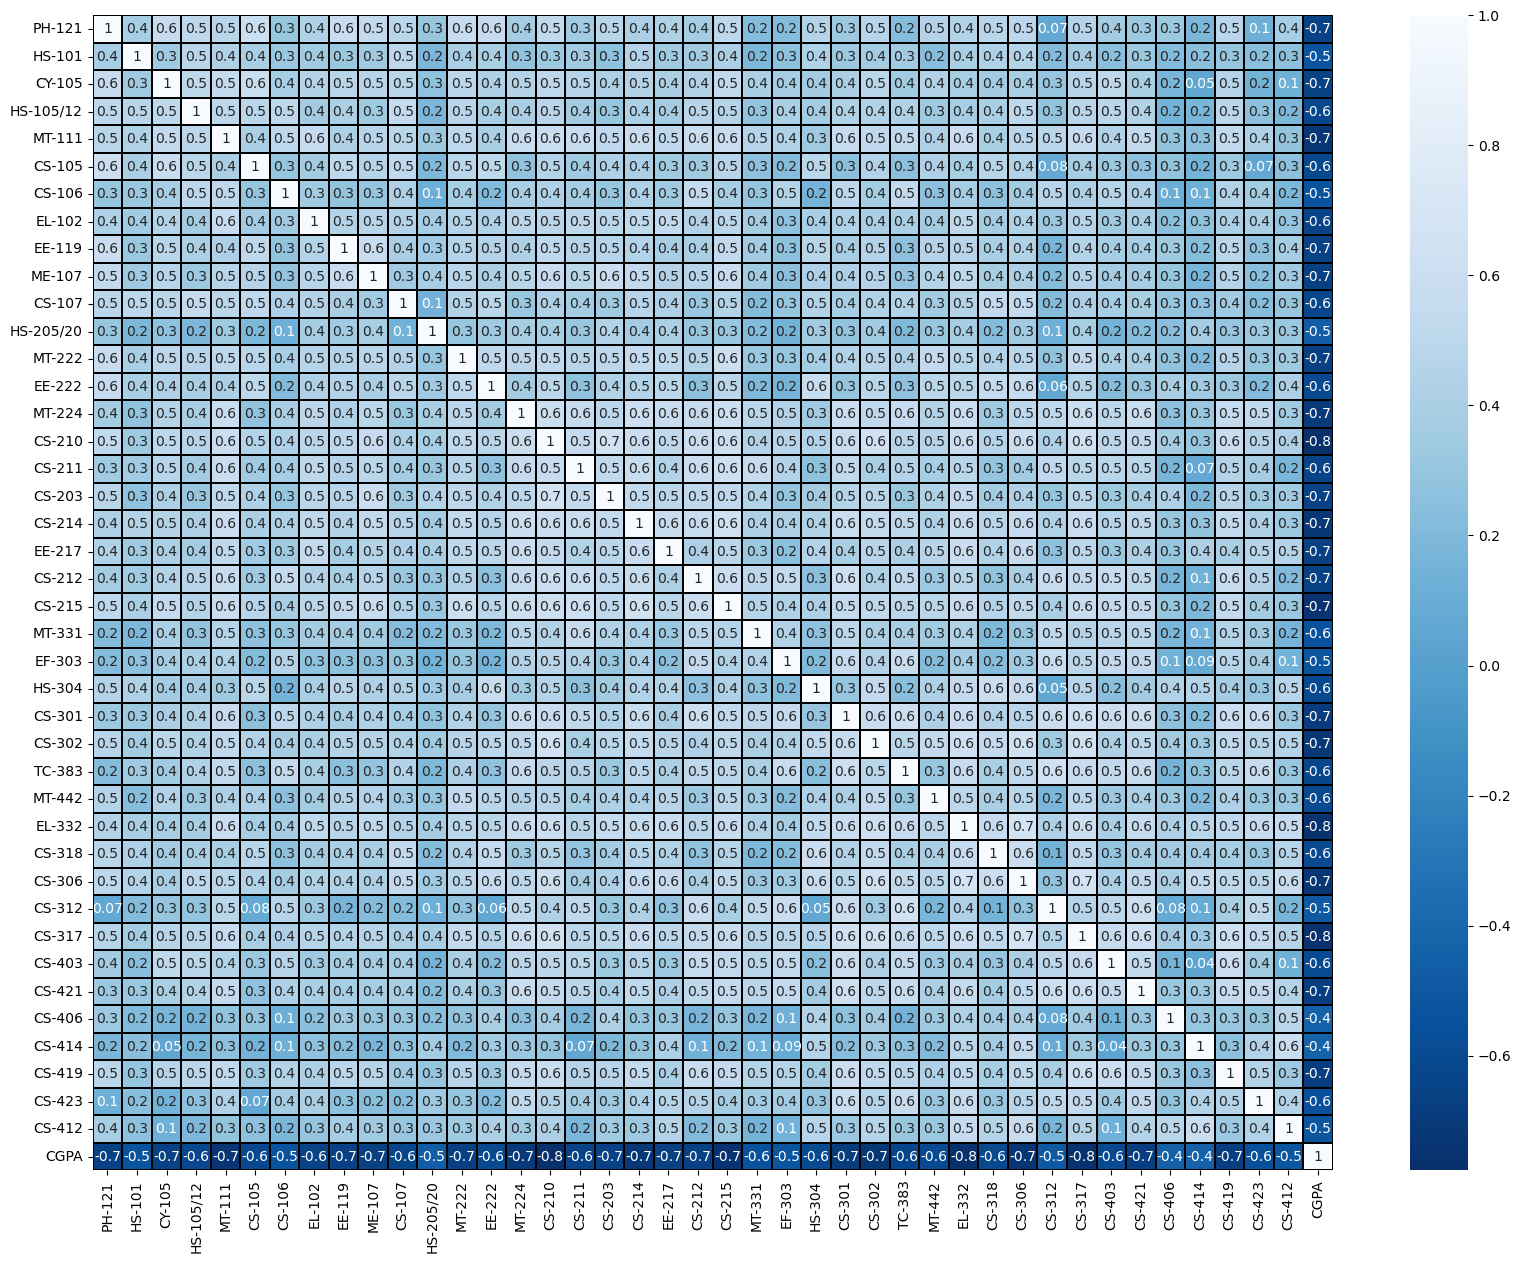

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                   

In [82]:
x=df.drop('CGPA',axis=1)

In [83]:
y=df['CGPA']

Feature scaling using StandardScaler method.

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [85]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,1.022864,...,0.654698,1.161705,1.157159,1.530930,0.947978,-0.045570,-0.993185,1.734677,-0.366108,-0.531176
1,-1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,-1.310604,2.302135,1.341424,...,1.710986,1.761537,1.522406,0.849569,1.317776,-0.045570,1.030910,0.888567,0.714752,-0.094885
2,-1.242052,-0.744483,-0.981031,0.235181,0.032395,-1.053643,0.319611,0.011033,-0.713496,-0.888497,...,-0.753686,-0.337873,-0.669075,-1.194515,0.208383,-2.249415,-0.993185,-1.649763,-0.726395,-1.403760
3,1.714365,0.692879,2.397746,1.488014,1.708105,-0.311348,2.156566,1.332669,1.925181,0.704303,...,1.358890,1.761537,0.426666,2.212291,0.947978,0.741662,0.221272,1.311622,1.075039,1.650282
4,-0.585070,-1.103823,-0.305275,-0.078027,-1.308173,-1.053643,-0.782562,0.011033,-1.467404,-0.888497,...,-0.753686,0.261958,-0.303828,0.168207,-0.161414,-0.045570,-0.993185,-0.803653,-0.726395,-1.403760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.981031,-0.704444,-0.973031,-1.053643,-0.782562,-0.649785,-1.090450,-0.251377,...,-0.049494,-0.637789,-1.034321,-1.194515,-2.010402,-2.249415,0.626091,0.042457,-0.366108,-1.403760
567,-0.913561,-1.822504,-0.981031,-1.330861,-1.308173,-1.053643,-1.517344,-0.649785,-1.467404,-1.525618,...,-0.753686,-0.037957,-0.303828,-1.194515,-2.010402,-0.045570,0.221272,-0.803653,0.714752,-0.531176
568,-0.256579,-1.822504,-0.305275,-0.078027,-1.308173,-1.053643,-1.517344,-1.310604,-1.467404,-0.569937,...,-0.049494,-0.637789,-0.669075,-1.194515,-0.531212,-2.249415,1.435729,0.042457,-0.726395,-0.531176
569,-1.242052,-0.385142,2.059868,-1.330861,1.708105,2.657832,0.319611,1.332669,0.417365,1.022864,...,-0.049494,1.461621,-0.669075,-0.172473,0.947978,1.389052,1.435729,-0.380598,0.354465,1.213991


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,2.887246,PH-121
1,1.777467,HS-101
2,2.535348,CY-105
3,2.330535,HS-105/12
4,2.663965,MT-111
5,2.400491,CS-105
6,1.953886,CS-106
7,1.986550,EL-102
8,2.201245,EE-119
9,2.318501,ME-107


As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building.

Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [88]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.9801658431613489 On random states 106


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [90]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.9696609699604627
R2_score on train data: 94.3756093772383
Mean absolute error: 0.07532568855114871
Mean squared error: 0.010946393627874616
Root mean squared error: 0.10462501435065429


In [91]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.9602235934481976
R2_score on train data: 98.971437555743
Mean absolute error: 0.08707529069767433
Mean squared error: 0.014351421342441823
Root mean squared error: 0.11979741792894295


In [92]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.9616174247468455
R2_score on train data: 94.27597918000097
Mean absolute error: 0.08539069767441868
Mean squared error: 0.013848523720930244
Root mean squared error: 0.11767975068349798


In [93]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.9657347051476516
R2_score on train data: 99.68811770943752
Mean absolute error: 0.08286044087643601
Mean squared error: 0.012362999236962807
Root mean squared error: 0.11118902480444194


In [94]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.9704746184210945
R2_score on train data: 94.37052087554478
Mean absolute error: 0.07395323012543611
Mean squared error: 0.010652827343349934
Root mean squared error: 0.10321253481699756


In [95]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.9696609831582781
R2_score on train data: 94.37560937723782
Mean absolute error: 0.07532566877205031
Mean squared error: 0.010946388866071655
Root mean squared error: 0.10462499159412944


In [96]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.8243308522592239
R2_score on train data: 100.0
Mean absolute error: 0.1901104651162791
Mean squared error: 0.06338184302325581
Root mean squared error: 0.2517575083751343


In [97]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.9687357220023722
R2_score on train data: 100.0
Mean absolute error: 0.07905883720930212
Mean squared error: 0.011280225274418559
Root mean squared error: 0.10620840491419951


Now we can check cross valdiation of all the model.

In [98]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.94071323 0.95245149 0.93556922 0.97394022 0.90136449]
0.9408077274001727
difference b/w R2_score and cross_val_score is: 2.8853242560289982


In [99]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(Rfr,x,y)
print(score1)
print(score1.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Rfr)-score1.mean())*100)

[0.94469119 0.93571356 0.94368309 0.94689721 0.86596485]
0.9273899788299144
difference b/w R2_score and cross_val_score is: 3.283361461828327


In [100]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.92193211 0.94805233 0.91554825 0.96066808 0.87576612]
0.9243933784646273
difference b/w R2_score and cross_val_score is: 3.7224046282218204


In [101]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.96601661 0.94396978 0.95943119 0.95580435 0.90399283]
0.9458429532669644
difference b/w R2_score and cross_val_score is: 1.9891751880687147


In [102]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.9410802  0.95281694 0.93536344 0.97449781 0.90114804]
0.9409812874159605
difference b/w R2_score and cross_val_score is: 2.949333100513396


In [103]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.94071323 0.95245149 0.93556922 0.97394023 0.9013645 ]
0.940807735768143
difference b/w R2_score and cross_val_score is: 2.885324739013506


In [104]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.85849138 0.86127907 0.84863346 0.7405381  0.71958912]
0.8057062241343937
difference b/w R2_score and cross_val_score is: 1.8624628124830123


In [105]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_etr)-score7.mean())*100)

[0.94638152 0.95834921 0.9588376  0.95698079 0.89751436]
0.9436126954569641
difference b/w R2_score and cross_val_score is: 2.51230265454081


As we can see above all model R2_score and crossval_score is less and score mean is 94% in GradientBoostingRegressor() model so this is the best model.

Hyper Parametr Tunning

In [111]:
from sklearn.model_selection import GridSearchCV
param={'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}
gscv=GridSearchCV(GradientBoostingRegressor(),param,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'loss': 'squared_error'}

In [112]:
model=GradientBoostingRegressor(loss='squared_error')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.9656123714241509
Mean absolute error: 0.08304170557528254
Mean squared error: 0.012407137533067105
Root mean squared error: 0.11138733111564844


Saving the Model

In [114]:
import joblib
import pickle
filename='CGPA score'
pickle.dump(model,open(filename,'wb'))

In [115]:
import pickle
load_model=pickle.load(open('CGPA score','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

96.5612371424151


Conclusion

In [116]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [117]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predicted,2.804138,3.53971,2.774959,3.577669,3.267796,3.837993,3.74311,3.380631,3.039983,2.210659,...,2.819958,2.485458,3.295459,3.415472,3.071627,2.192898,3.522236,3.390556,2.885032,2.252279
Original,2.822000,3.58300,2.699000,3.540000,3.241000,3.730000,3.84000,3.405000,2.995000,1.923000,...,2.870000,2.347000,3.193000,3.345000,3.172000,2.488000,3.580000,3.408000,2.953000,2.129000
